In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ford vs Tesla

In [2]:
ford = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/Ford.csv',index_col=0, parse_dates=True)
tsla = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/TSLA.csv',index_col=0, parse_dates=True)

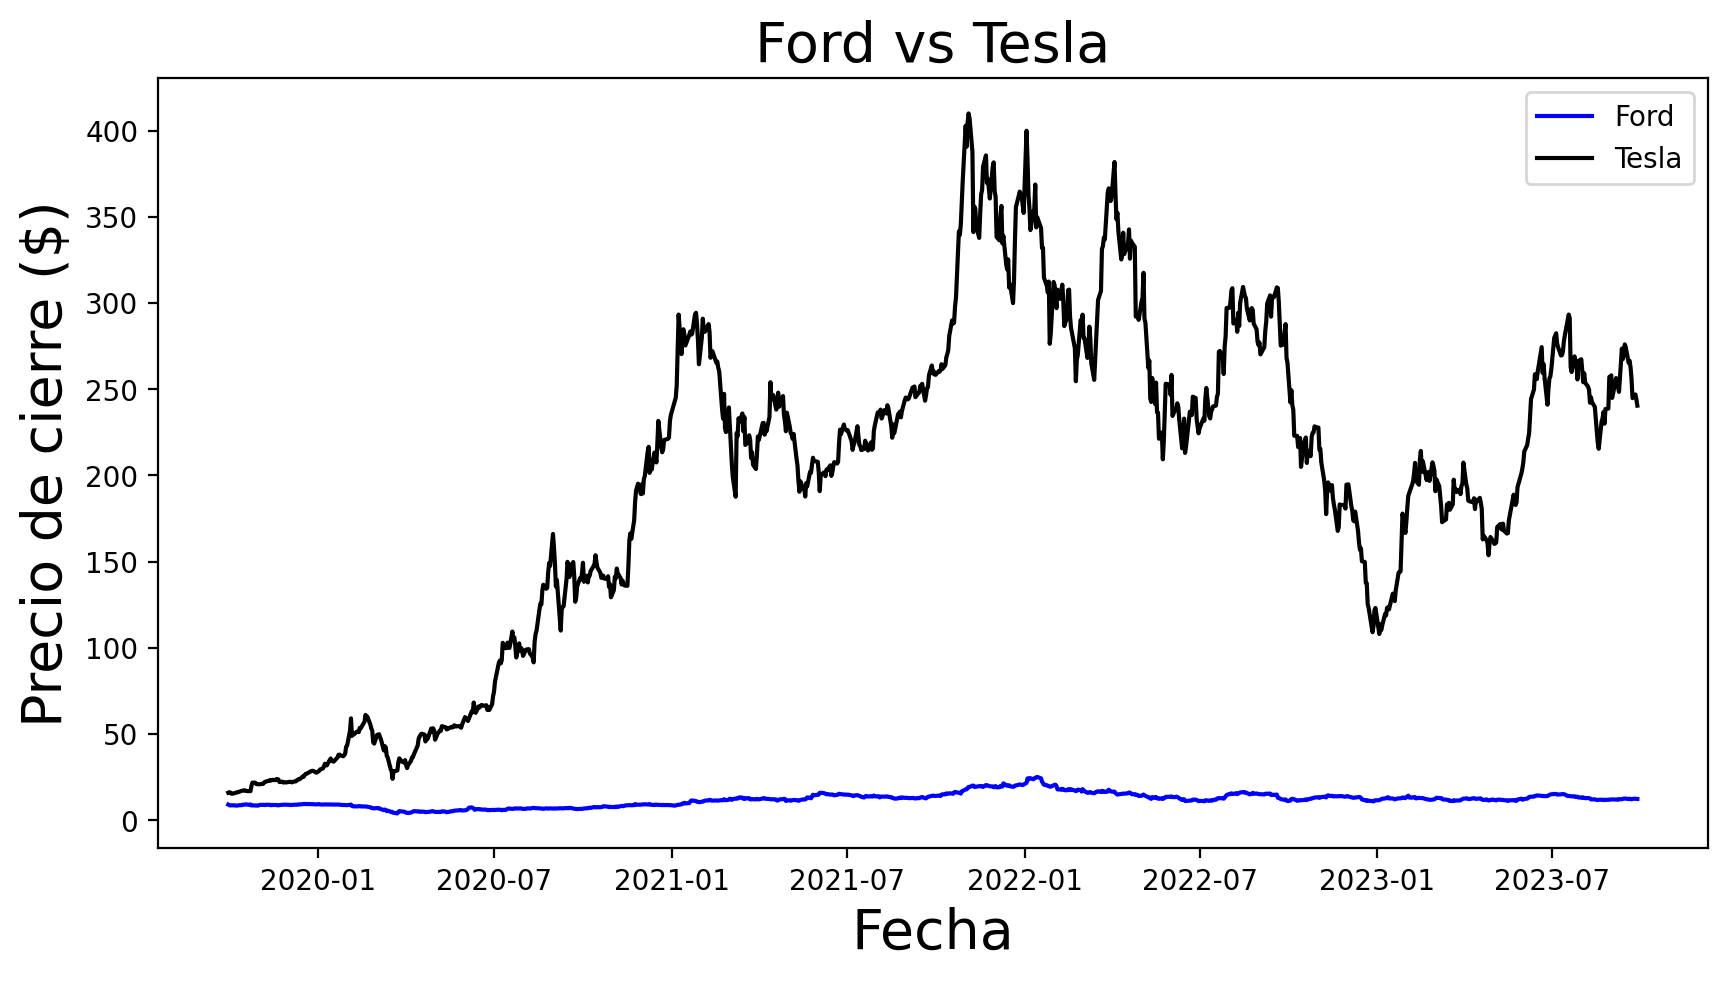

In [4]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
ax.plot(ford['Close'], color='blue', label='Ford');
ax.plot(tsla['Close'], color='black',  label='Tesla');

ax.set_xlabel('Fecha', fontdict = {'fontsize':20 })
ax.set_ylabel('Precio de cierre ($)', fontdict = {'fontsize':20 })


ax.set_title('Ford vs Tesla', fontdict = {'fontsize':20 })
ax.tick_params(labelsize=10)
ax.legend()

<Axes: xlabel='Close', ylabel='Count'>

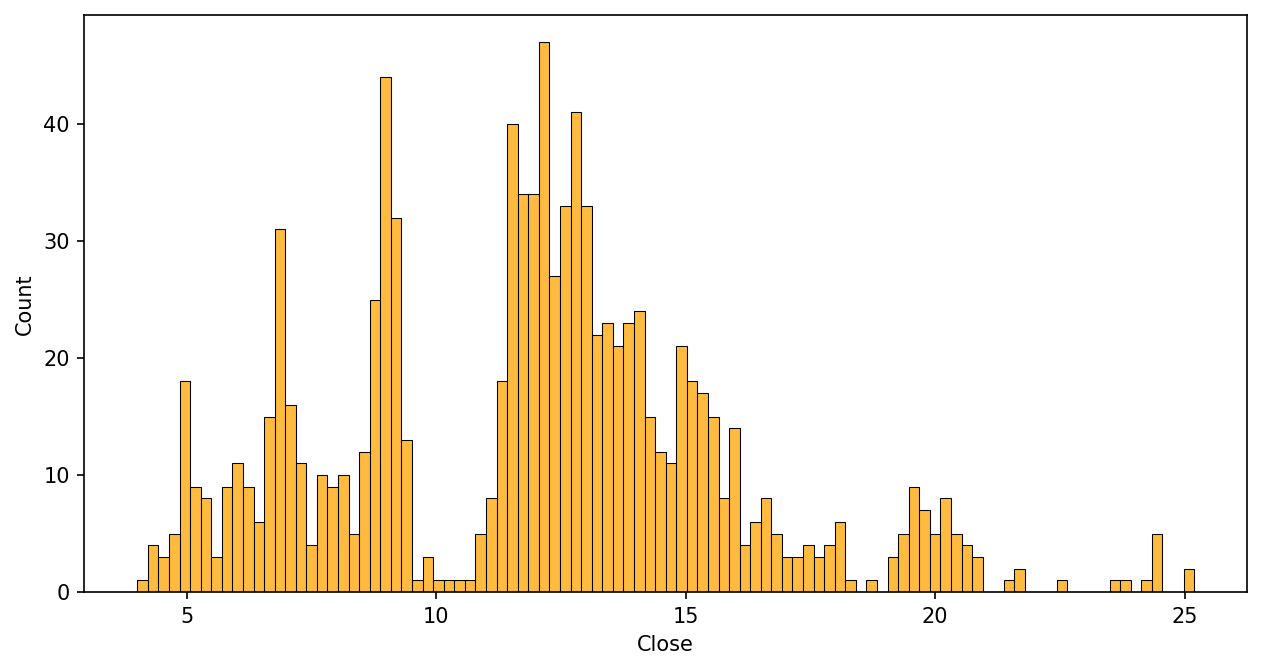

In [5]:
plt.figure(figsize=(10,5), dpi=150)
sns.histplot(ford['Close'], bins=100, color='orange')

<Axes: xlabel='Close', ylabel='Count'>

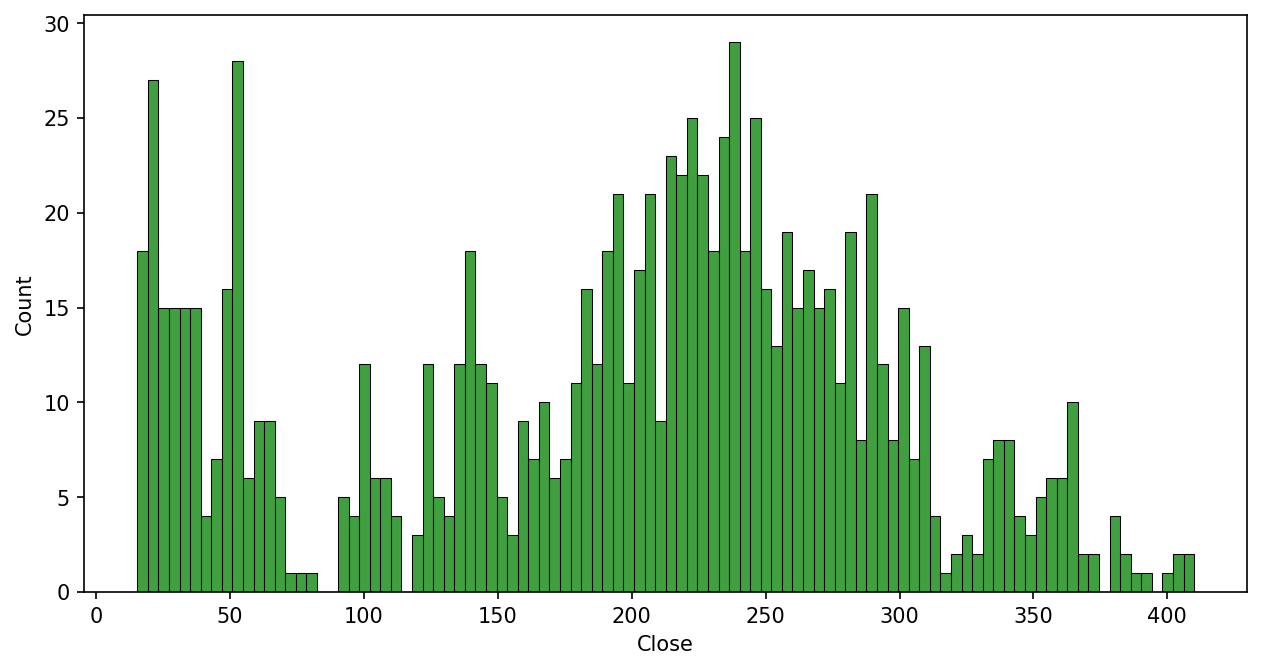

In [6]:
plt.figure(figsize=(10,5), dpi=150)
sns.histplot(tsla['Close'], bins=100, color='green')

Llamaremos **serie temporal ó serie de tiempo** a una colección de $n$ datos $\{ x_t\}_{t\leq n }$ indexados por un tiempo $t$, es decir, ordenados cronológicamente.  La  indexación $t$ de una serie temporal debe ser en intervalos de una misma longitud, tales como anual, mensual, semanal, diaria, por hora, etc. 

Sea $\{ x_t\}_{t\leq n }$ una serie temporal del precio de un activo en un tiempo $t$,  la **serie de rendimientos** de $\{ x_t\}_{t\leq n }$ se denota como $\{ r_t\}_{t\leq n }$, donde 

\begin{equation}\label{ren}
r_t= \ln( \frac{x_t}{x_{t-1}})= \ln(x_t)-\ln(x_{t-1}).
\end{equation}

Para cada $t=1,...,n.$

In [7]:
ford['rendim_ford'] = ford["Close"].pct_change()
tsla['rendim_tsla'] = tsla["Close"].pct_change()

In [9]:
ford

,Open,High,Low,Close,Adj Close,rendim_ford
Date,,,,,,
2019-09-30,9.11,9.21,9.10,9.16,7.847744,NaN
2019-10-01,9.19,9.24,8.87,8.90,7.624991,-0.028384
2019-10-02,8.85,8.86,8.44,8.61,7.376537,-0.032584
2019-10-03,8.55,8.71,8.45,8.71,7.462211,0.011614
2019-10-04,8.72,8.76,8.66,8.74,7.487914,0.003444
...,...,...,...,...,...,...
2023-09-21,12.20,12.35,12.16,12.20,12.200000,-0.012945
2023-09-22,12.50,12.77,12.41,12.43,12.430000,0.018852
2023-09-25,12.35,12.70,12.34,12.58,12.580000,0.012068


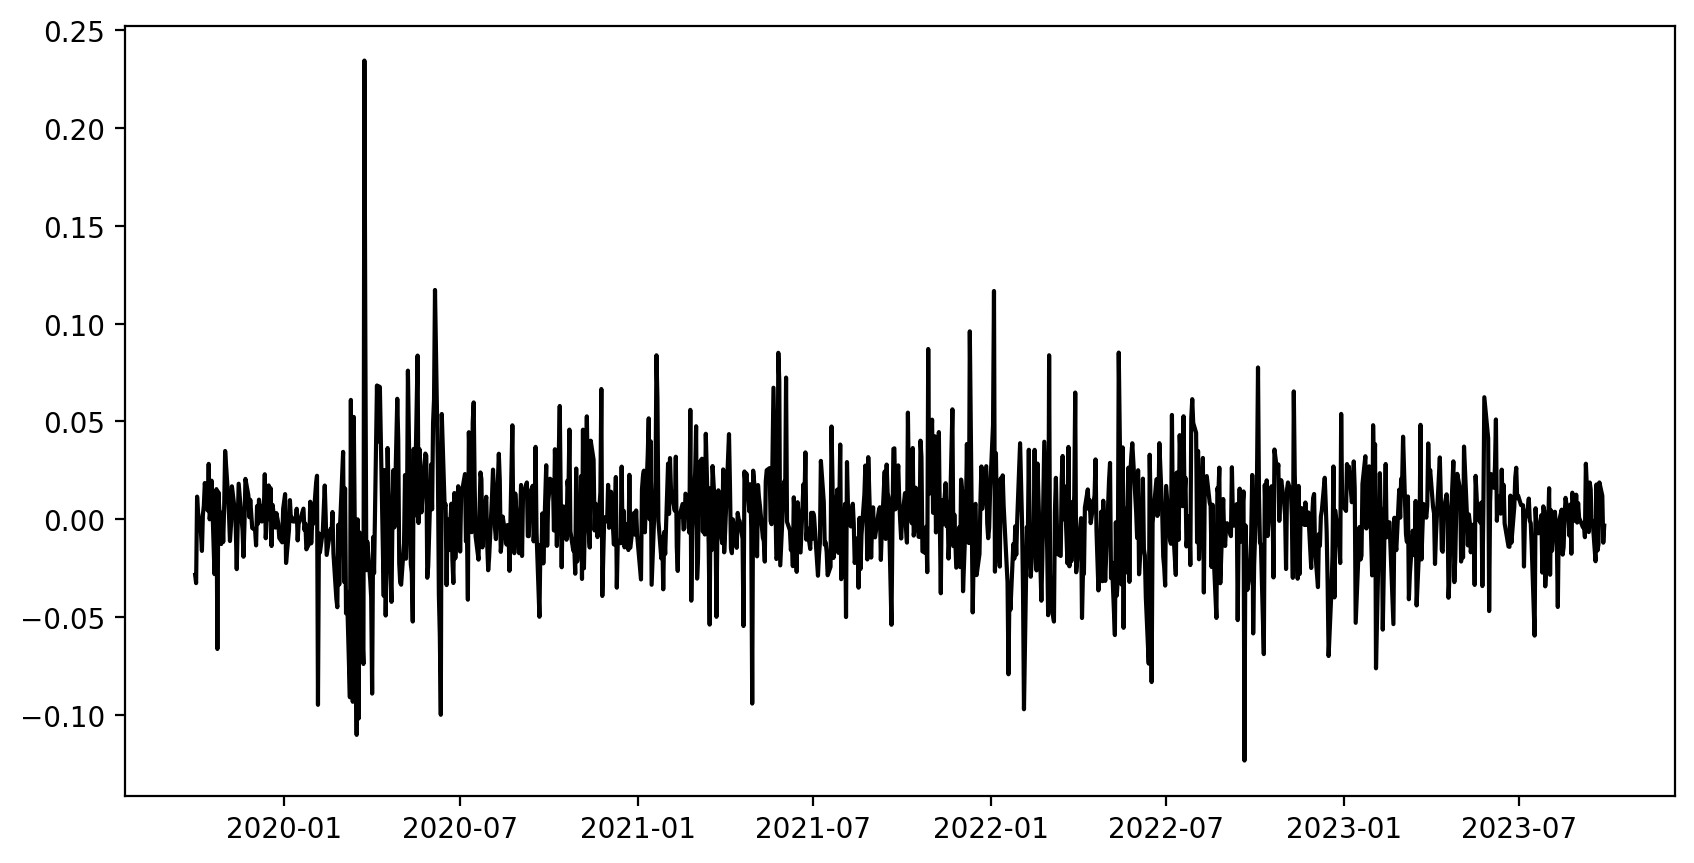

In [11]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
ax.plot(ford['rendim_ford'], color='black', label='Ford');

ax.tick_params(labelsize=10)

In [14]:
from scipy.stats import norm

<Axes: xlabel='rendim_ford', ylabel='Count'>

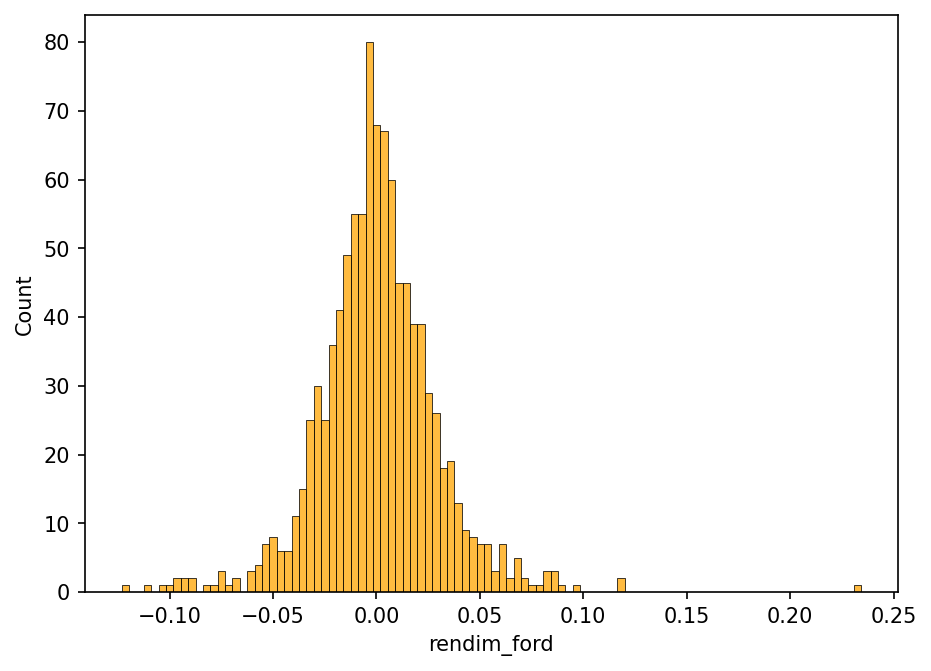

In [12]:
plt.figure(figsize=(7,5), dpi=150)
sns.histplot(ford['rendim_ford'], bins=100, color='orange')

<Axes: xlabel='rendim_tsla', ylabel='Count'>

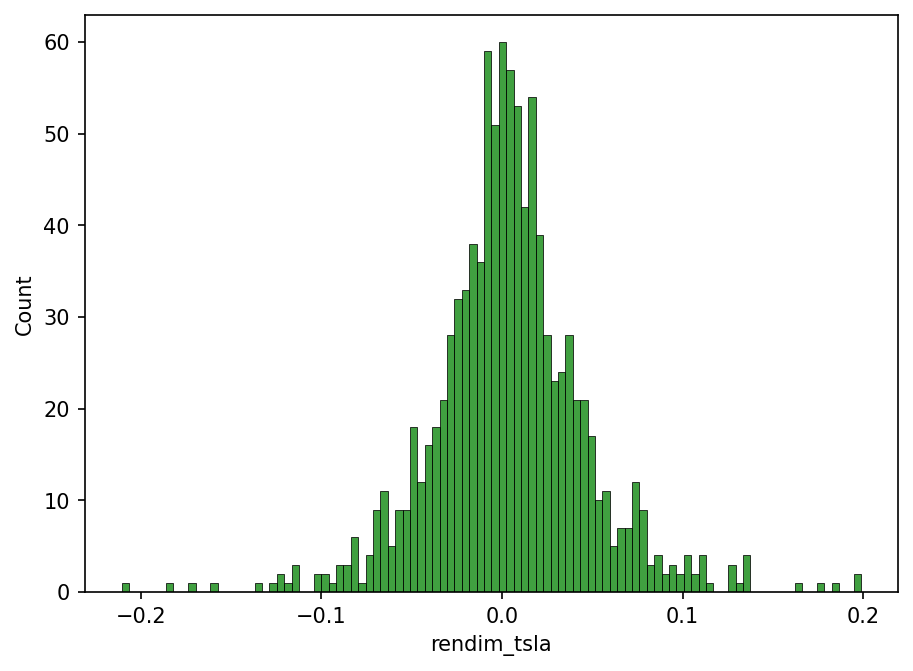

In [13]:
plt.figure(figsize=(7,5), dpi=150)
sns.histplot(tsla['rendim_tsla'], bins=100, color='green')

Un gráfico Q-Q es un método gráfico para el diagnóstico de diferencias entre la distribución de probabilidad de una población de la que se ha extraído una muestra aleatoria y una distribución usada para la comparación. 

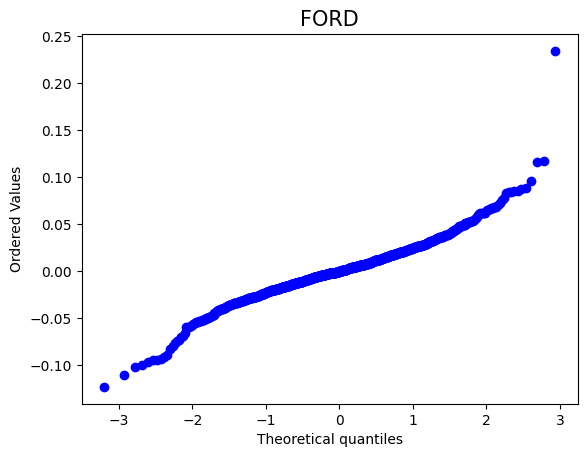

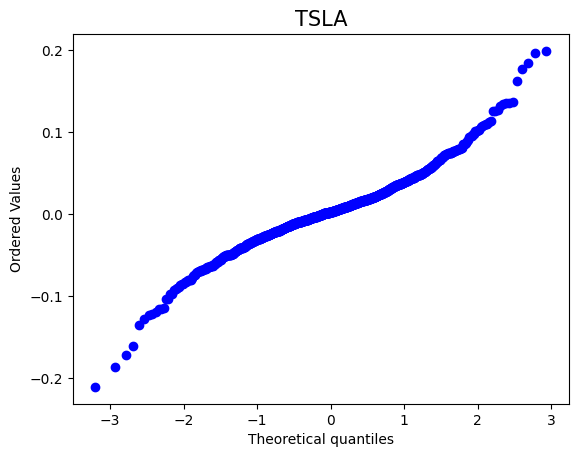

In [17]:
import pylab
import scipy.stats as stats

stats.probplot(ford['rendim_ford'],dist='norm',plot=pylab)
plt.title("FORD", fontsize=15)
pylab.show()

stats.probplot(tsla['rendim_tsla'],dist='norm',plot=pylab)
plt.title("TSLA", fontsize=15)
pylab.show()

In [18]:
rendim = pd.concat([ford['rendim_ford'],tsla['rendim_tsla']], 
                   axis = 1)
rendim

,rendim_ford,rendim_tsla
Date,,
2019-09-30,NaN,NaN
2019-10-01,-0.028384,0.015859
2019-10-02,-0.032584,-0.006375
2019-10-03,0.011614,-0.041542
2019-10-04,0.003444,-0.006866
...,...,...
2023-09-21,-0.012945,-0.026239
2023-09-22,0.018852,-0.042315
2023-09-25,0.012068,0.008616


<Axes: >

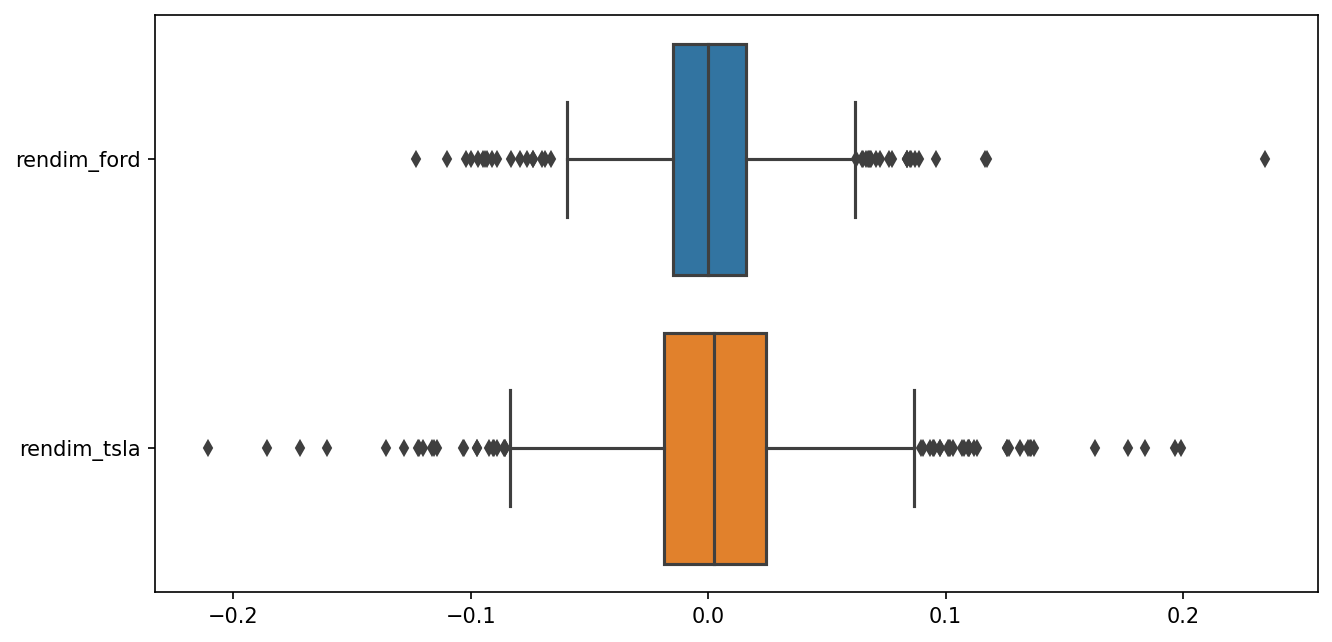

In [19]:
plt.figure(figsize=(10,5), dpi=150)
sns.boxplot(data=rendim, orient='h')

## Agregación de datos

Las agregaciones hacen referencia a cualquier transformación de datos que produce valores escalares a partir de arrays.

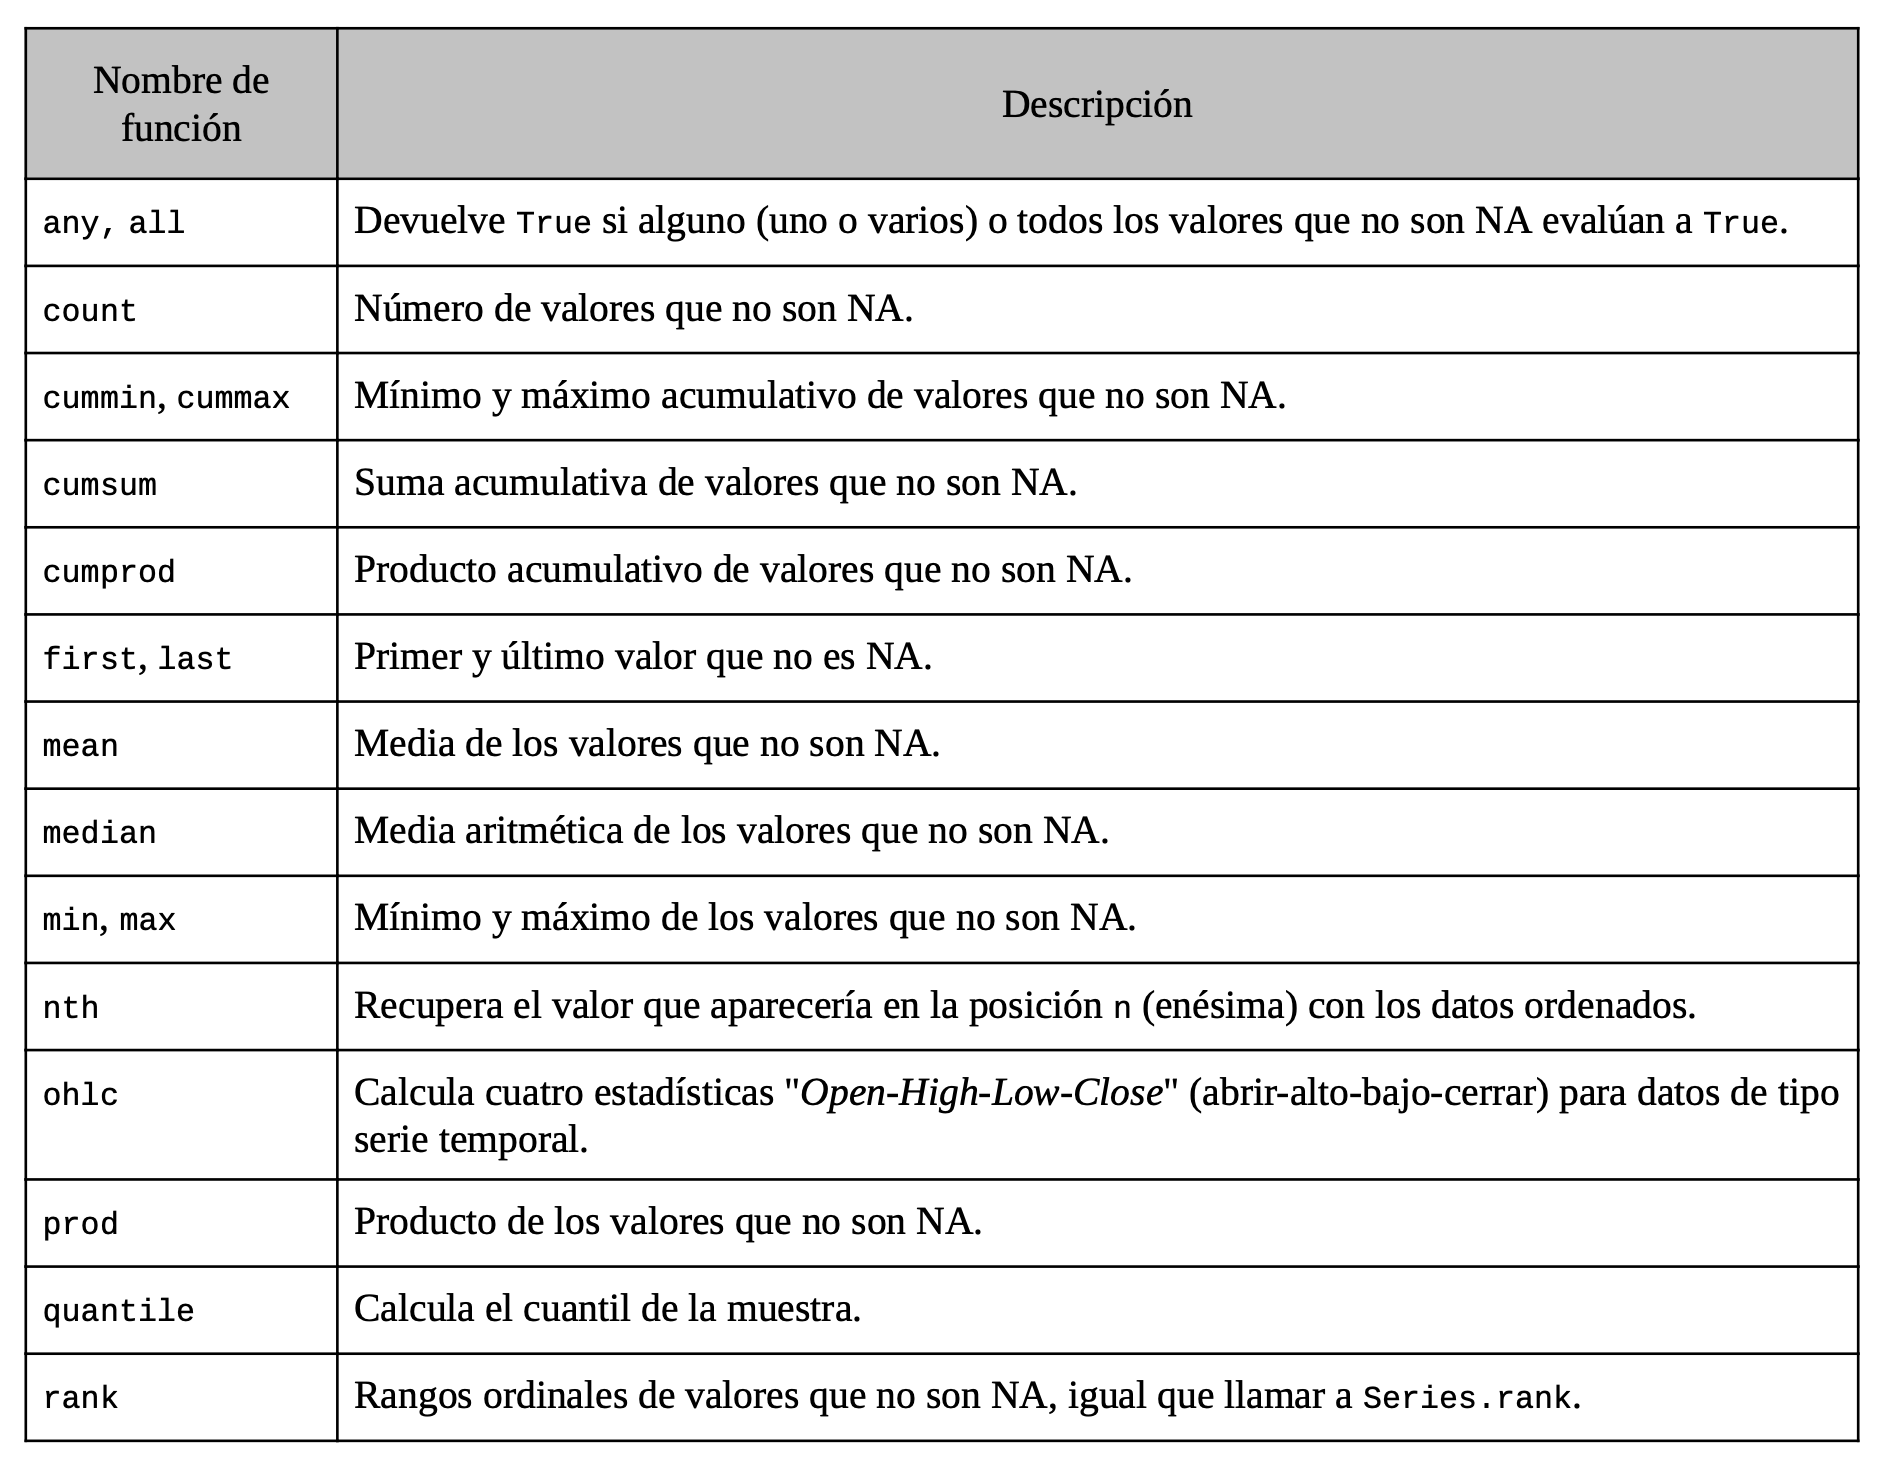

### Atlas de riesgo - Inundaciones

In [20]:
df = pd.read_csv('inund_2021.csv')

In [21]:
df

,alcaldia,intensidad,area_m2,perime_m
0,Xochimilco,Bajo,973904.0292,6805.448256
1,Xochimilco,Muy Bajo,795548.3644,4693.752691
2,Benito Juárez,Muy Alto,168263.3241,1712.409605
3,Xochimilco,Muy Alto,267499.3689,2488.603256
4,Benito Juárez,Muy Alto,202062.4083,2113.713857
...,...,...,...,...
4903,Iztapalapa,Alto,296180.5397,3060.734718
4904,Iztapalapa,Muy Alto,365614.1782,3633.520195
4905,Iztapalapa,Muy Alto,182703.3783,2305.988052
4906,Coyoacán,Muy Bajo,102549.6402,1697.363942


In [22]:
grouped = df.groupby('alcaldia')

El método **nsmallest** devuelve las n filas con el valor más pequeño

In [29]:
grouped['area_m2'].nlargest(3)

alcaldia                    
Azcapotzalco            824     2.043973e+06
                        4321    2.043973e+06
                        743     1.928335e+06
Benito Juárez           2640    4.868854e+05
                        3341    4.868854e+05
                        3044    4.614507e+05
Coyoacán                2781    7.251734e+06
                        4897    7.251734e+06
                        153     1.501951e+06
Cuajimalpa de Morelos   1783    3.680818e+07
                        2081    3.680818e+07
                        3836    3.305472e+06
Cuauhtémoc              407     6.214439e+05
                        463     6.214439e+05
                        803     5.006941e+05
Gustavo A. Madero       151     2.980252e+06
                        3575    2.980252e+06
                        923     2.273693e+06
Iztacalco               1996    1.629848e+06
                        3750    1.629848e+06
                        67      9.772363e+05
Iztapalapa              22

Para utilizar nuestras propias funciones de agregación, pasamos cualquier función que agregue un array al método **aggregate** o a su alias abreviado **agg**:

In [30]:
def p(arr):
    return arr.max()- arr.min()

In [31]:
grouped['area_m2'].agg(p)

alcaldia
Azcapotzalco              1.995346e+06
Benito Juárez             3.901566e+05
Coyoacán                  7.220762e+06
Cuajimalpa de Morelos     3.670992e+07
Cuauhtémoc                5.983557e+05
Gustavo A. Madero         2.945431e+06
Iztacalco                 1.583383e+06
Iztapalapa                2.254734e+06
La Magdalena Contreras    4.514878e+07
Miguel Hidalgo            2.862994e+06
Milpa Alta                1.638484e+08
Tlalpan                   1.033677e+08
Tláhuac                   2.106176e+07
Venustiano Carranza       7.412781e+06
Xochimilco                1.735719e+07
Álvaro Obregón            2.607932e+07
Name: area_m2, dtype: float64

In [32]:
grouped.describe()

area_m2                                            
                         count          mean           std          min   
alcaldia                                                                  
Azcapotzalco             206.0  3.252093e+05  3.335319e+05  48626.66693  \
Benito Juárez            204.0  2.615714e+05  8.642091e+04  96728.74779   
Coyoacán                 312.0  3.453837e+05  5.961623e+05  30972.15033   
Cuajimalpa de Morelos     66.0  2.164048e+06  6.229401e+06  98264.92246   
Cuauhtémoc               306.0  2.124119e+05  1.144658e+05  23088.14081   
Gustavo A. Madero        612.0  2.870464e+05  2.910939e+05  34821.35063   
Iztacalco                220.0  2.097913e+05  1.856970e+05  46465.35671   
Iztapalapa               916.0  2.469071e+05  2.185806e+05  10199.02489   
La Magdalena Contreras   106.0  1.195581e+06  6.132575e+06  32055.25490   
Miguel Hidalgo           262.0  3.541104e+05  3.702298e+05  32658.63541   
Milpa Alta                92.0  6.478456e+06  2.565228e+07  15980.56004   
Tlalpan                  422.0  1.489355e+06  8.690122e+06   5990.91238   
Tláhuac                  230.0  7.458235e+05  2.518811e+06  10605.43349   
Venustiano Carranza      302.0  2.240819e+05  6.005475e+05  19149.82199   
Xochimilco               252.0  9.049653e+05  2.346848e+06   9832.67796   
Álvaro Obregón           400.0  4.790981e+05  1.860031e+06  20239.62394   

                                                                    
                                  25%           50%           75%   
alcaldia                                                            
Azcapotzalco            174096.145050  231763.52750  3.390774e+05  \
Benito Juárez           204138.915900  260430.72650  3.024335e+05   
Coyoacán                147991.929175  272026.53755  3.804806e+05   
Cuajimalpa de Morelos   326326.753700  951005.30090  1.580758e+06   
Cuauhtémoc              132688.571900  215700.99960  2.814367e+05   
Gustavo A. Madero       166619.197000  222251.22535  2.952724e+05   
Iztacalco               114343.060100  166482.77505  2.512328e+05   
Iztapalapa              126010.802300  194188.30420  3.010778e+05   
La Magdalena Contreras  193472.796300  284507.29870  4.755214e+05   
Miguel Hidalgo          152523.828275  265642.23270  3.987730e+05   
Milpa Alta              254867.748600  785022.60795  1.084645e+06   
Tlalpan                 207317.637550  303727.50390  4.969986e+05   
Tláhuac                 176419.098225  277755.50580  4.489406e+05   
Venustiano Carranza     101166.016320  164622.70390  2.161354e+05   
Xochimilco              238466.532900  425562.36345  7.638466e+05   
Álvaro Obregón          126848.594550  221090.28030  4.527666e+05   

                                     perime_m                              
                                 max    count         mean           std   
alcaldia                                                                   
Azcapotzalco            2.043973e+06    206.0  2515.098056   1095.107204  \
Benito Juárez           4.868854e+05    204.0  2413.177493    582.856405   
Coyoacán                7.251734e+06    312.0  2617.466251   1295.587187   
Cuajimalpa de Morelos   3.680818e+07     66.0  7227.971042   9301.890845   
Cuauhtémoc              6.214439e+05    306.0  2025.807267    729.842191   
Gustavo A. Madero       2.980252e+06    612.0  2441.761092   1112.671553   
Iztacalco               1.629848e+06    220.0  2103.180092    770.617628   
Iztapalapa              2.264933e+06    916.0  2265.991287    962.032658   
La Magdalena Contreras  4.518084e+07    106.0  3643.838551   5142.182224   
Miguel Hidalgo          2.895653e+06    262.0  2904.209807   1602.373595   
Milpa Alta              1.638644e+08     92.0  8604.432914  17670.600249   
Tlalpan                 1.033737e+08    422.0  4025.619301   5950.463531   
Tláhuac                 2.107236e+07    230.0  3336.837077   3768.020388   
Venustiano Carranza     7.431931e+06    302.0  2038.636069   1282.207

In [33]:
df = pd.read_csv('ej_bar.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Agregamos  el porcentaje de la propina en la factura total:

In [34]:
df['tip_pct'] = df['tip'] / (df['total_bill'])

In [35]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


La agregación en una serie o en las columnas de un dataframe es simplemente cuestión de usar aggregate (o agg) con la función deseada o llamar a un método como mean o std. Sin embargo, quizá sea preferible realizar este proceso utilizando otra función, dependiendo de la columna, o varias funciones al mismo tiempo. 

Primero agrupamos las propinas por 'day' y 'smoker'

In [36]:
grouped= df.groupby(['day','smoker'])

In [37]:
grouped_pct = grouped['tip_pct']

Para estadísticas descriptivas, se puede pasar el nombre de la función como una cadena de texto:

In [38]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

Si en lugar de esto pasamos una lista de funciones o de nombres de funciones, obtenemos de vuelta un dataframe en el que los nombres de las columnas se han tomado de las funciones:

In [39]:
grouped_pct.agg(['mean','std',p])

mean       std         p
day  smoker                              
Fri  No      0.151650  0.028123  0.067349
     Yes     0.174783  0.051293  0.159925
Sat  No      0.158048  0.039767  0.235193
     Yes     0.147906  0.061375  0.290095
Sun  No      0.160113  0.042347  0.193226
     Yes     0.187250  0.154134  0.644685
Thur No      0.160298  0.038774  0.193350
     Yes     0.163863  0.039389  0.151240

Si se pasa una lista de tuplas *(name, function)*, el primer elemento de cada tupla se utilizará para los nombres de las columnas del dataframe

In [40]:
grouped_pct.agg([('Average','mean'),('S.D.',np.std)])

Average      S.D.
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

Es posible especificar la lista de funciones que se van a aplicar a todas las columnas o distintas funciones por columna.

In [41]:
functions = ['count', 'mean', 'max']

In [42]:
result = grouped[['tip_pct', 'total_bill']].agg(functions)

In [43]:
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

Supongamos que queremos aplicar funciones distintas a una columna o a varias. Para ello le pasamos a agg un diccionario que contiene nombres de columna asignados a cualquiera de las especificaciones de función:

In [44]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [45]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

## Análisis de contenedor

In [46]:
df = pd.read_csv('inund_2021.csv',nrows=100)

In [47]:
df = df.drop(['intensidad','alcaldia'],axis=1)

In [48]:
df

,area_m2,perime_m
0,973904.0292,6805.448256
1,795548.3644,4693.752691
2,168263.3241,1712.409605
3,267499.3689,2488.603256
4,202062.4083,2113.713857
...,...,...
95,149620.8553,1693.879696
96,106609.0708,1303.275027
97,320612.9500,3948.159340
98,297359.3136,2318.157189


Combinar  funciones con groupby resulta conveniente para realizar análisis de contenedor o cuantil en un conjunto de datos. 

In [49]:
quartiles = pd.cut(df['area_m2'], 5)

In [50]:
quartiles

0     (880623.75, 1170887.441]
1       (590360.06, 880623.75]
2        (8381.36, 300096.369]
3        (8381.36, 300096.369]
4        (8381.36, 300096.369]
                ...           
95       (8381.36, 300096.369]
96       (8381.36, 300096.369]
97     (300096.369, 590360.06]
98       (8381.36, 300096.369]
99       (8381.36, 300096.369]
Name: area_m2, Length: 100, dtype: category
Categories (5, interval[float64, right]): [(8381.36, 300096.369] < (300096.369, 590360.06] < (590360.06, 880623.75] < (880623.75, 1170887.441] < (1170887.441, 1461151.132]]

El objeto Categorical devuelto por cut se le puede pasar directamente a groupby. Así, podríamos calcular un conjunto de estadísticas de grupo para los cuartiles, de este modo:

In [51]:
def get_stats(group):
    return pd.DataFrame(
        {'min': group.min(), 'max': group.max(),
         'count': group.count(), 'mean': group.mean()})

In [52]:
grouped = df.groupby(quartiles)

In [53]:
grouped.apply(get_stats)

min           max  count   
area_m2                                                                  
(8381.36, 300096.369]      area_m2   9.832678e+03  2.973593e+05     72  \
                           perime_m  5.830956e+02  3.721527e+03     72   
(300096.369, 590360.06]    area_m2   3.111777e+05  5.620147e+05     17   
                           perime_m  2.691862e+03  4.994457e+03     17   
(590360.06, 880623.75]     area_m2   6.355126e+05  7.955484e+05      5   
                           perime_m  3.964008e+03  5.029815e+03      5   
(880623.75, 1170887.441]   area_m2   9.716974e+05  1.064287e+06      5   
                           perime_m  4.811841e+03  6.805448e+03      5   
(1170887.441, 1461151.132] area_m2   1.461151e+06  1.461151e+06      1   
                           perime_m  6.038300e+03  6.038300e+03      1   

                                             mean  
area_m2                                            
(8381.36, 300096.369]      area_m2   1.772433e+05  
                           perime_m  2.080570e+03  
(300096.369, 590360.06]    area_m2   4.256033e+05  
                           perime_m  3.391988e+03  
(590360.06, 880623.75]     area_m2   7.055940e+05  
                           perime_m  4.412315e+03  
(880623.75, 1170887.441]   area_m2   9.937261e+05  
                           perime_m  5.777281e+03  
(1170887.441, 1461151.132] area_m2   1.461151e+06  
                           perime_m  6.038300e+03

Otra forma:

In [54]:
grouped.agg(['min', 'max', 'count', 'mean'])

area_m2                                     
                                     min           max count          mean   
area_m2                                                                      
(8381.36, 300096.369]       9.832678e+03  2.973593e+05    72  1.772433e+05  \
(300096.369, 590360.06]     3.111777e+05  5.620147e+05    17  4.256033e+05   
(590360.06, 880623.75]      6.355126e+05  7.955484e+05     5  7.055940e+05   
(880623.75, 1170887.441]    9.716974e+05  1.064287e+06     5  9.937261e+05   
(1170887.441, 1461151.132]  1.461151e+06  1.461151e+06     1  1.461151e+06   

                               perime_m                                  
                                    min          max count         mean  
area_m2                                                                  
(8381.36, 300096.369]        583.095637  3721.526864    72  2080.569807  
(300096.369, 590360.06]     2691.862478  4994.456704    17  3391.987588  
(590360.06, 880623.75]      3964.008024  5029.814649     5  4412.315071  
(880623.75, 1170887.441]    4811.840946  6805.448256     5  5777.281083  
(1170887.441, 1461151.132]  6038.299744  6038.299744     1  6038.299744